In [1]:
import numpy as np
import pickle
import os
import tqdm
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
%matplotlib inline

In [3]:
data_path = 'mathorcup_recom_listwise/data/'
user_path = 'data_splitted_by_user_id'

In [4]:
if not os.path.exists(data_path + 'userID2idx.pickle'):
    train_df = pd.read_csv(data_path + 'train_data.csv', dtype=str)
    train_userID = set(train_df.loc[:, 'userID'])
    userID2idx = {_: str(i).zfill(7) for i, _ in enumerate(train_userID)}
    with open(data_path + 'userID2idx.pickle', 'wb') as handle:
        pickle.dump(userID2idx, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path + 'userID2idx.pickle', 'rb') as handle:
    userID2idx = pickle.load(handle)
len(userID2idx)

958123

In [5]:
if not os.path.exists(data_path + 'userIdx2ID.pickle'):
    userIdx2ID = dict()
    for k, v in tqdm.tqdm(userID2idx.items()):
        userIdx2ID[v] = k
    with open(data_path + 'userIdx2ID.pickle', 'wb') as handle:
        pickle.dump(userIdx2ID, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path + 'userIdx2ID.pickle', 'rb') as handle:
    userIdx2ID = pickle.load(handle)
len(userIdx2ID)

958123

In [6]:
# with open(data_path + 'contentTC2ID.pickle', 'rb') as handle:
#     contentTC2ID = pickle.load(handle)
with open(data_path + 'contentID2idx.pickle', 'rb') as handle:
    contentID2idx = pickle.load(handle)
# with open(data_path + 'key2idx.pickle', 'rb') as handle:
#     key2idx = pickle.load(handle)

In [7]:
train_clickeds = np.empty([958123, 1485], dtype=np.float32)
train_clickeds[:] = np.nan
train_durations = np.empty([958123, 1485], dtype=np.float32)
train_durations[:] = np.nan
train_recommeds = np.zeros([958123, 1485], dtype=np.int32)

In [8]:
count = 0
for aaa in tqdm.tqdm(os.listdir(user_path)):
    for bb in os.listdir(user_path + '/{}'.format(aaa)):
        for cc in os.listdir(user_path + '/{}/{}'.format(aaa, bb)):
            userIdx = aaa + bb + cc[:-4]
            temp_df = pd.read_csv('data_splitted_by_user_id/{}/{}/{}.csv'.format(aaa, bb, cc[:-4]), dtype=str)
            userID = temp_df.loc[0, 'userID']
            assert userIdx == userID2idx[userID]
            clickeds = np.empty(1485)
            clickeds[:] = np.nan
            durations = np.empty(1485)
            durations[:] = np.nan
            recommeds = np.zeros(1485)
            for s in temp_df.sequence:
                for icd in s.split(';'):
                    i, c, d = icd.split(':')
                    contentIdx = contentID2idx[i]
                    if np.isnan(clickeds[contentIdx]):
                        clickeds[contentIdx] = 0
                        durations[contentIdx] = 0
                    if eval(c):  # recommended and read
                        clickeds[contentIdx] += 1
                        durations[contentIdx] += eval(d)
                    recommeds[contentIdx] += 1
            train_clickeds[count, :] = clickeds
            train_durations[count, :] = durations
            train_recommeds[count, :] = recommeds
            count += 1

100%|██████████| 96/96 [54:01<00:00, 33.77s/it]


In [9]:
with open(data_path + 'train_clickeds.pickle', 'wb') as handle:
    pickle.dump(train_clickeds, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path + 'train_durations.pickle', 'wb') as handle:
    pickle.dump(train_durations, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path + 'train_recommeds.pickle', 'wb') as handle:
    pickle.dump(train_recommeds, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [27]:
np.where(clickeds == 0)

(array([   3,   16,   18,   19,   38,   42,   44,   45,   49,   52,   56,
          65,  103,  131,  139,  151,  183,  229,  230,  256,  262,  272,
         302,  328,  331,  332,  337,  347,  383,  402,  443,  463,  473,
         508,  509,  581,  585,  613,  614,  615,  618,  619,  637,  648,
         717,  744,  747,  785,  796,  803,  804,  827,  828,  855,  890,
         896,  897,  904,  905,  937,  958,  987, 1012, 1017, 1057, 1072,
        1083, 1143, 1159, 1175, 1197, 1211, 1217, 1220, 1253, 1278, 1288,
        1342, 1352, 1379, 1391, 1394, 1400, 1409, 1461, 1475], dtype=int64),)

In [28]:
np.where(durations == 0)

(array([   3,   16,   18,   19,   38,   42,   44,   45,   49,   52,   56,
          65,  103,  131,  139,  151,  183,  229,  230,  256,  262,  272,
         302,  328,  331,  332,  337,  347,  383,  402,  443,  463,  473,
         508,  509,  581,  585,  613,  614,  615,  618,  619,  637,  648,
         717,  744,  747,  785,  796,  803,  804,  827,  828,  855,  890,
         896,  897,  904,  905,  937,  958,  987, 1012, 1017, 1057, 1072,
        1083, 1143, 1159, 1175, 1197, 1211, 1217, 1220, 1253, 1278, 1288,
        1342, 1352, 1379, 1391, 1394, 1400, 1409, 1461, 1475], dtype=int64),)

<BarContainer object of 1485 artists>

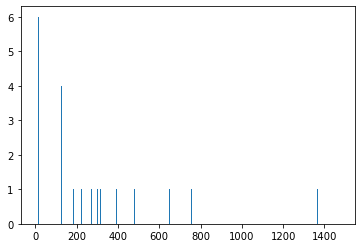

In [25]:
plt.bar(range(len(train_clickeds[0,:])), train_clickeds[0,:], width=2)

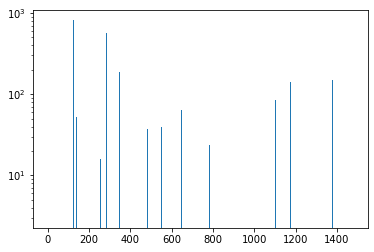

In [30]:
plt.bar(range(len(train_durations[0,:])), train_durations[0,:], width=2)
plt.yscale('log')

<BarContainer object of 1485 artists>

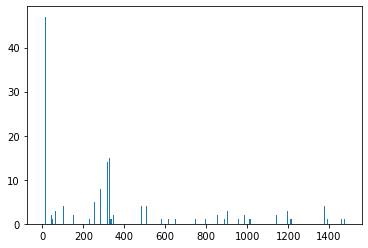

In [24]:
plt.bar(range(len(train_recommeds[0,:])), train_recommeds[0,:], width=2)

In [19]:
_

1485

In [ ]:
with open(data_path + 'recommend_matrix.pickle', 'wb') as handle:
    pickle.dump(recommend_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)